In [9]:
# 必要なライブラリの導入
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
plt.rcParams["font.family"] = "Noto Sans CJK JP"  # 日本語入力対応

In [10]:
# 分布を確認するデータリストの読み込み
LOS_df = pd.read_csv("/home/shibumtk/B4research/estimate/data/01master_data/Logit_master2.csv", encoding="utf-8-sig")
print(len(LOS_df))
LOS_df.columns

47160


Index(['Personal_ID', 'HouseholdIncome', 'sex', 'age', 'JobType',
       'ComuTime[m]', 'HouseholdType', 'HouseholdMembers(all)', 'WorkTime[m]',
       'PriTrip', 'first_transportation', 'FacailtyType', 'TripPurpose',
       'StayTime', 'walk_av', 'walk_time[m]', 'bicycle_av', 'bicycle_time[m]',
       'bicycle_parking_fee', 'bus_av', 'bus_time[m]', 'bus_cost',
       'dist_nearest_BusStop[km]', 'car_av', 'car_time[m]', 'car_cost'],
      dtype='object')

In [11]:
# 集計カラム
# 連続量
con_col = ['ComuTime[m]','WorkTime[m]','walk_time[m]','bicycle_time[m]',
           'car_time[m]','car_cost']
con_col0 = ['StayTime', 'dist_nearest_BusStop[km]', 'bus_time[m]', 'bus_cost']

# 離散量
dis_col = ['PriTrip', 'HouseholdMembers(all)','first_transportation','FacailtyType','TripPurpose','bicycle_parking_fee']

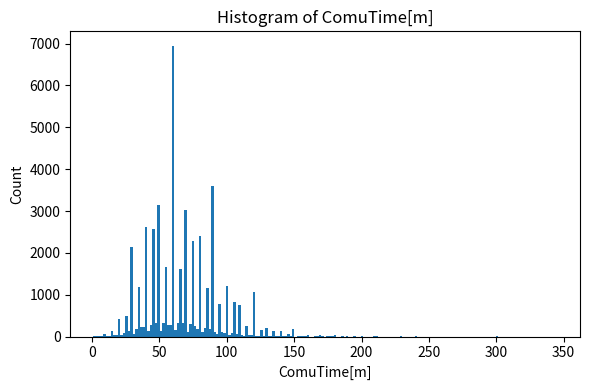

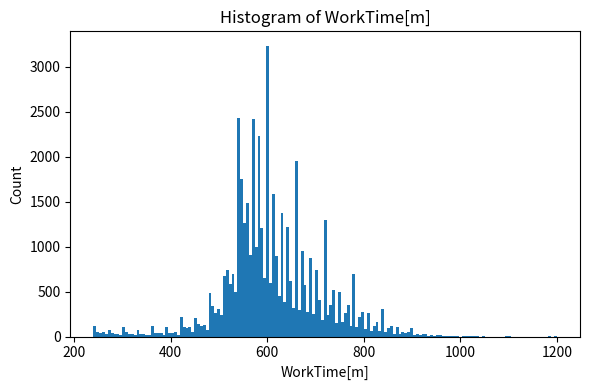

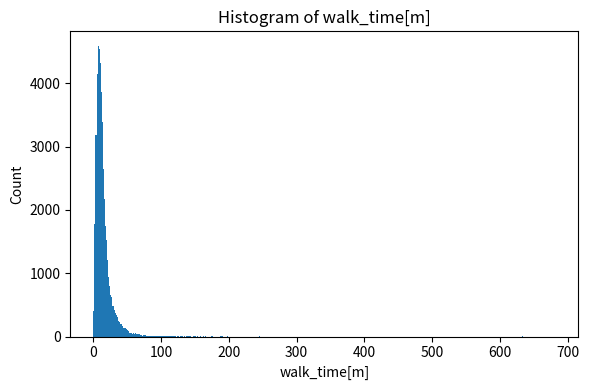

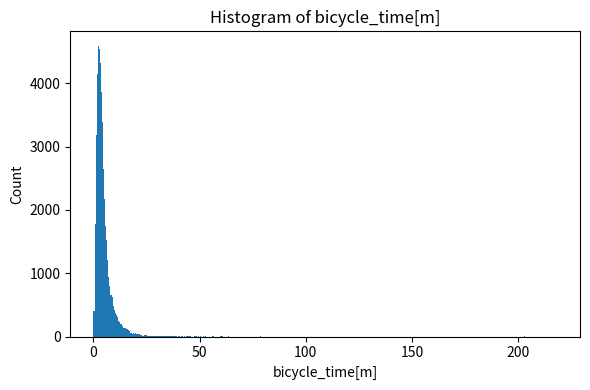

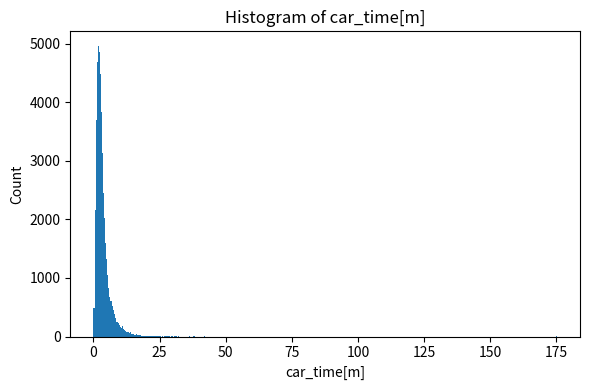

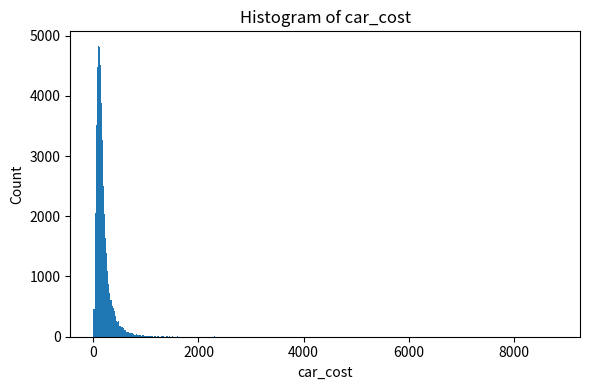

In [12]:
# 連続量カラムの各ヒストグラムを作成
for col in con_col:
    s = pd.to_numeric(LOS_df[col], errors="coerce").dropna()

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.hist(s, bins="auto") # 自動ビン幅
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.set_title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()

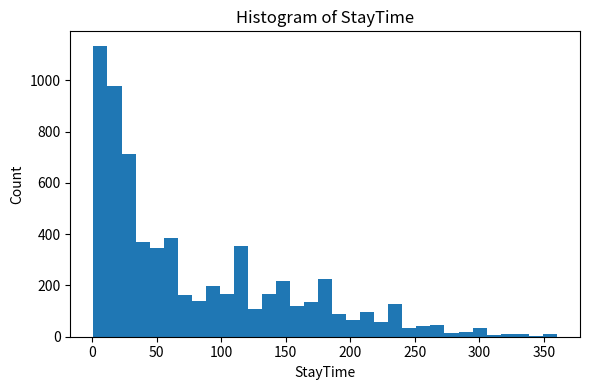

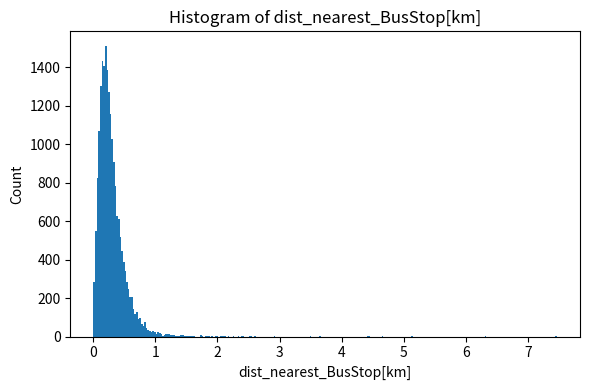

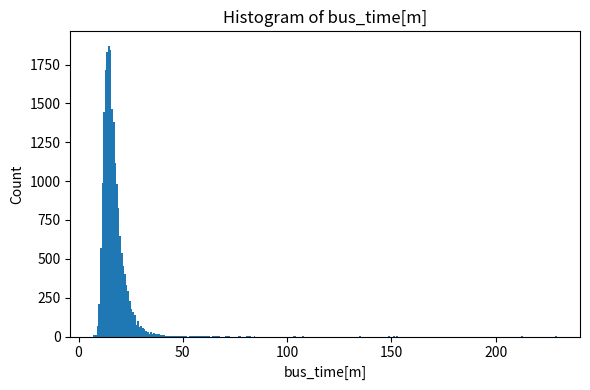

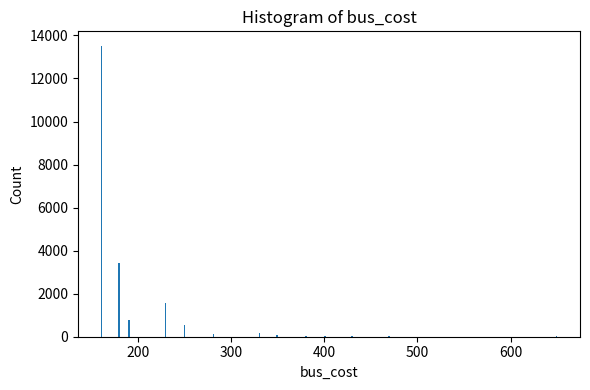

In [13]:
# 連続量カラムの各ヒストグラムを作成
for col in con_col0:
    s = pd.to_numeric(LOS_df[col], errors="coerce").dropna()
    s = s[s != 0]

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.hist(s, bins="auto") # 自動ビン幅
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.set_title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()

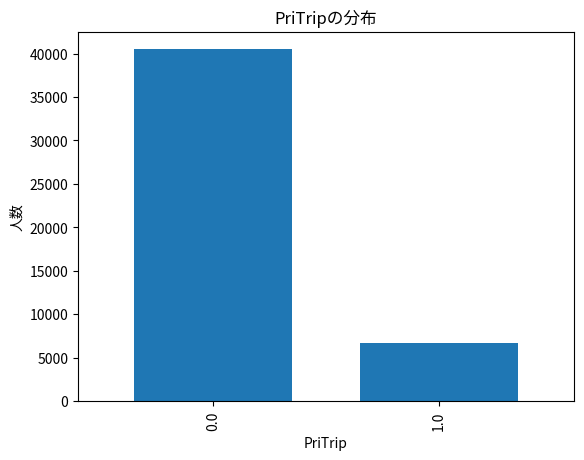

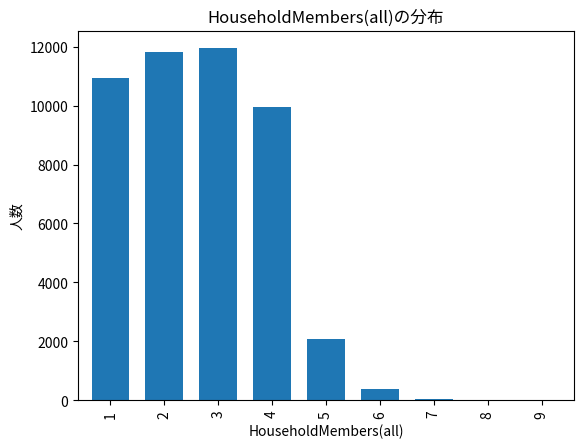

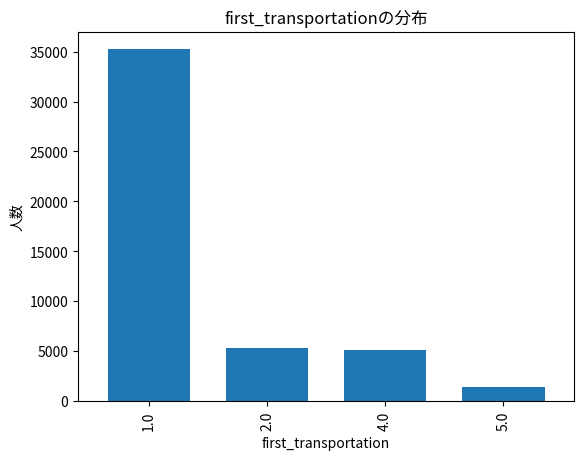

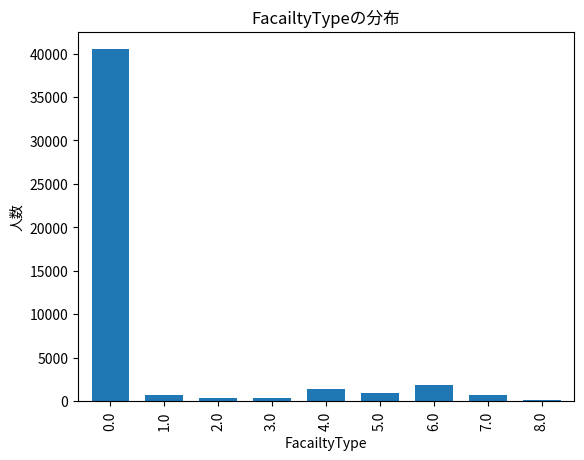

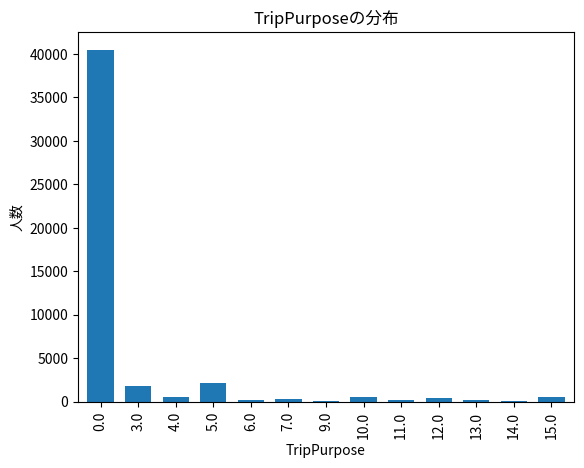

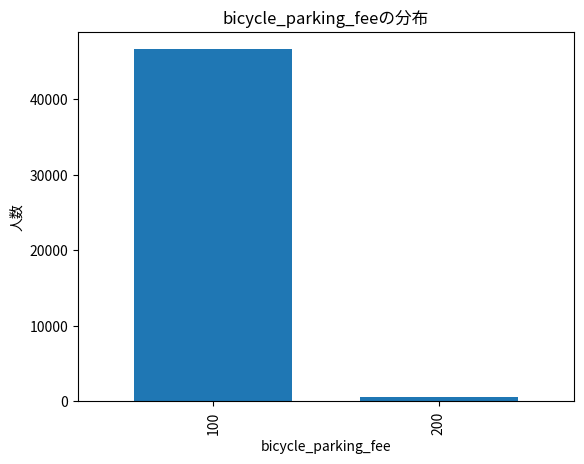

In [14]:
# 離散データの棒グラフを作成
# countごとに人数を集計
for col in dis_col:
    count_freq = LOS_df[col].value_counts().sort_index()
    count_freq.plot(kind="bar", width=0.7)
    plt.xlabel(col)
    plt.ylabel("人数")
    plt.title(f"{col}の分布")
    plt.show()

In [15]:
# VIFの計算
# VIF計算用関数
def calc_vif(df_features: pd.DataFrame) -> pd.DataFrame:
    """
    df_features: 説明変数だけを含むDataFrame（目的変数は含めない）
    """
    X = sm.add_constant(df_features)  # 切片を追加
    vif = pd.DataFrame({
        "variable": X.columns,
        "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    })
    # 定数行（const）は除外して返すことが多い
    return vif[vif["variable"] != "const"].reset_index(drop=True)

In [16]:
# VIFの算出
features = LOS_df[['ComuTime[m]', 'WorkTime[m]', 'StayTime', 'walk_time[m]']]
calc_vif(features)

,variable,VIF
0,ComuTime[m],1.072531
1,WorkTime[m],1.029836
2,StayTime,1.031824
3,walk_time[m],1.068587
